<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import pylab

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:
movies.sort_values(by='duration', ascending=True).head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [8]:
movies.sort_values(by='duration', ascending=True).tail()

,star_rating,title,content_rating,genre,duration,actors_list
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

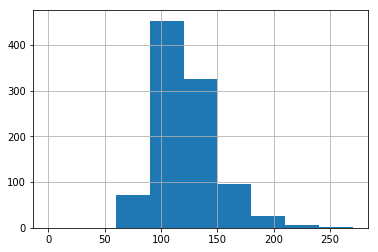

In [9]:
# Answer:
movies['duration'].hist(bins=(0, 30, 60, 90, 120, 150, 180, 210, 240, 270))

#### Use a box plot to display that same data.

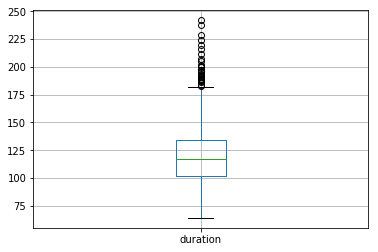

In [10]:
# Answer:
movies.boxplot('duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [11]:
# Answer:
content_rating = movies['content_rating'].value_counts()
content_rating


R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

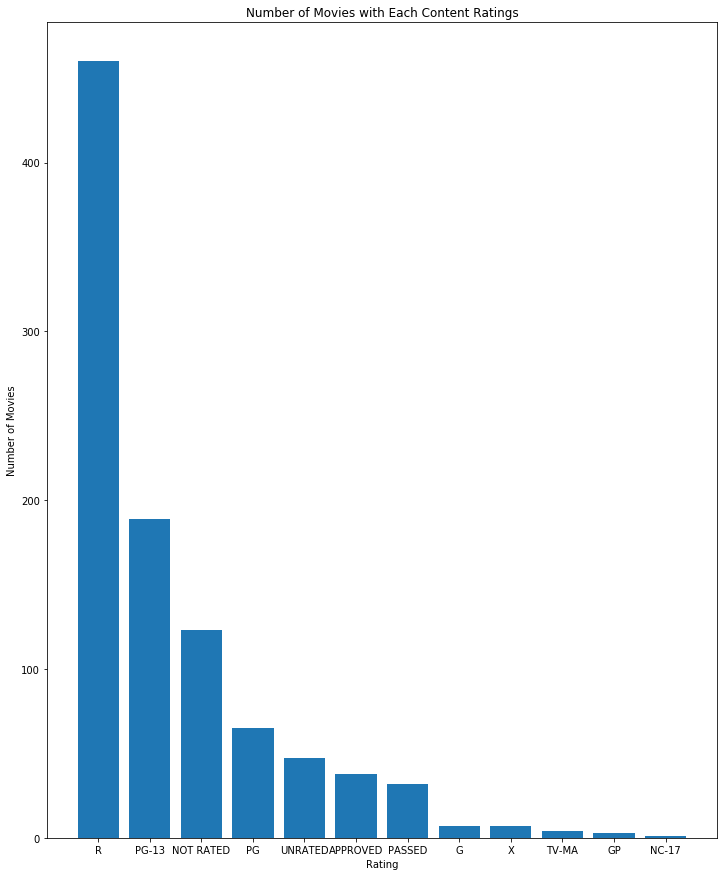

In [16]:
# Answer:
plt.bar(movies['content_rating'].dropna().unique(), content_rating)

plt.title('Number of Movies with Each Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')

plt.show()

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [17]:
# Answer:
movies['content_rating'].replace(('NOT RATED', 'APPROVED', 'PASSED', 'GP'), 'UNRATED', inplace=True)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [18]:
# Answer:
movies['content_rating'].replace(('TV-MA', 'X'), 'NC-17', inplace = True)

#### Count the number of missing values in each column.

In [19]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [20]:
# Answer:
movies['content_rating'].fillna('UNRATED', inplace = True)
movies.isna().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [21]:
# Answer:
less_than_2 = movies[movies['duration']<120]
less_than_2['star_rating'].mean()

7.838666666666657

In [22]:
more_than_2 = movies[movies['duration']>=120]
more_than_2['star_rating'].mean()

7.948898678414082

#### Use a visualization to detect whether there is a relationship between duration and star rating.

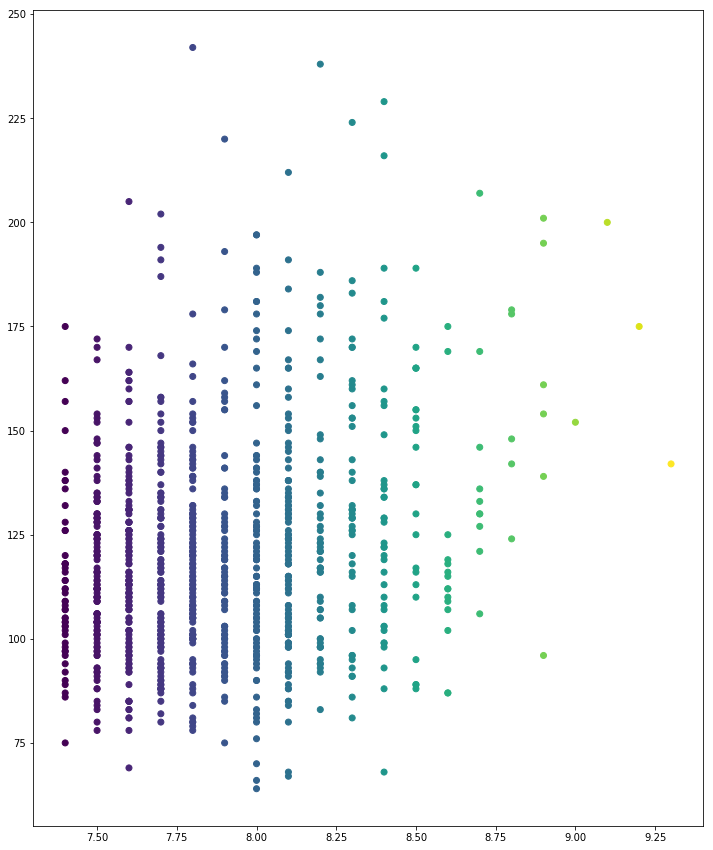

In [23]:
# Answer:
plt.scatter(movies['star_rating'], movies['duration'], c = movies['star_rating'])

#### Calculate the average duration for each genre.

In [24]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028A72346208>,
      dtype=object)

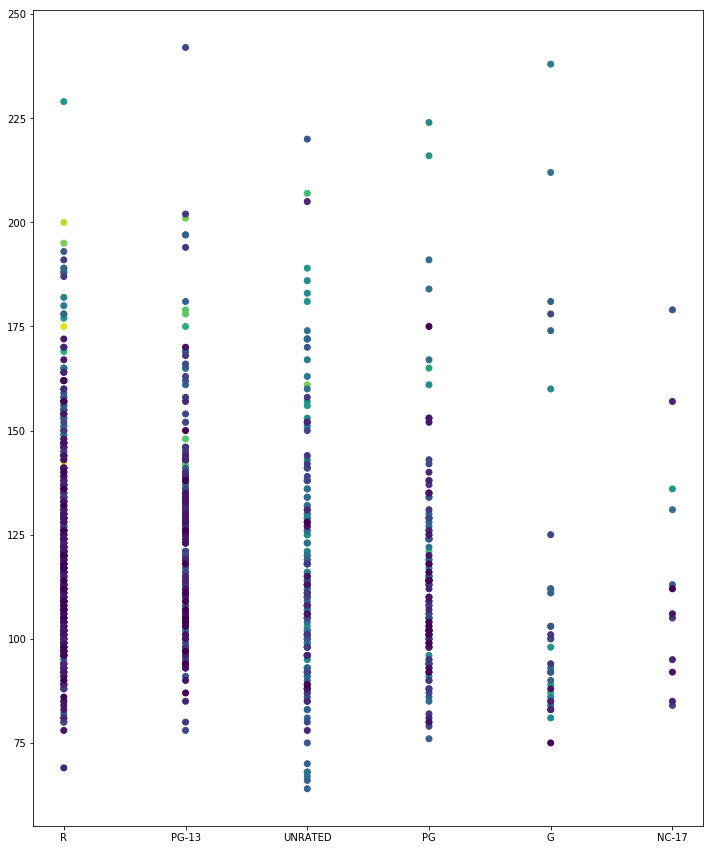

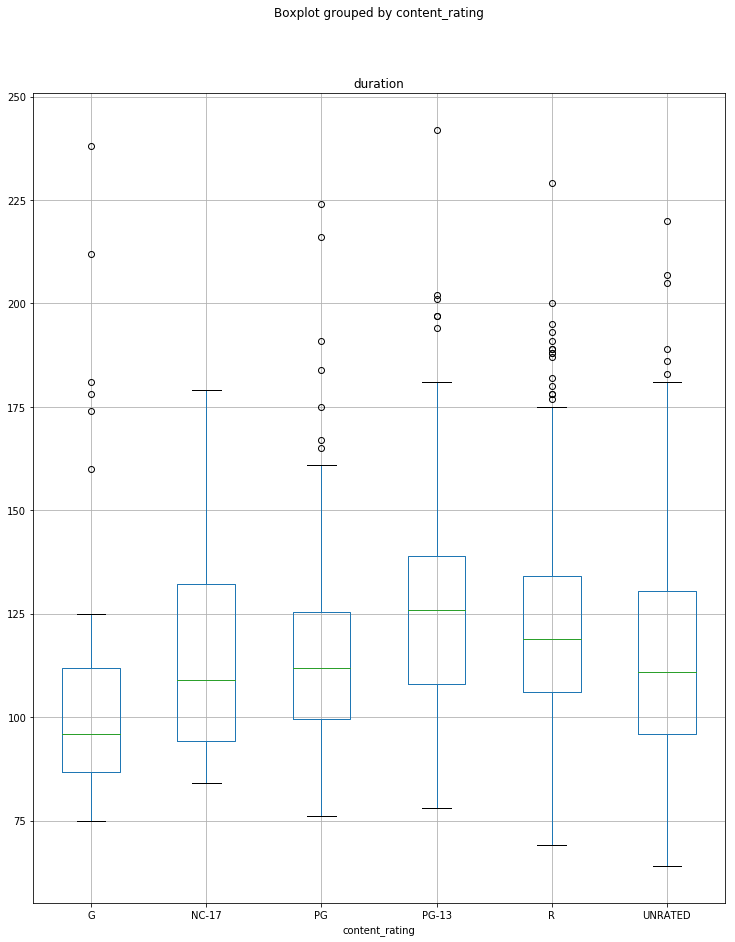

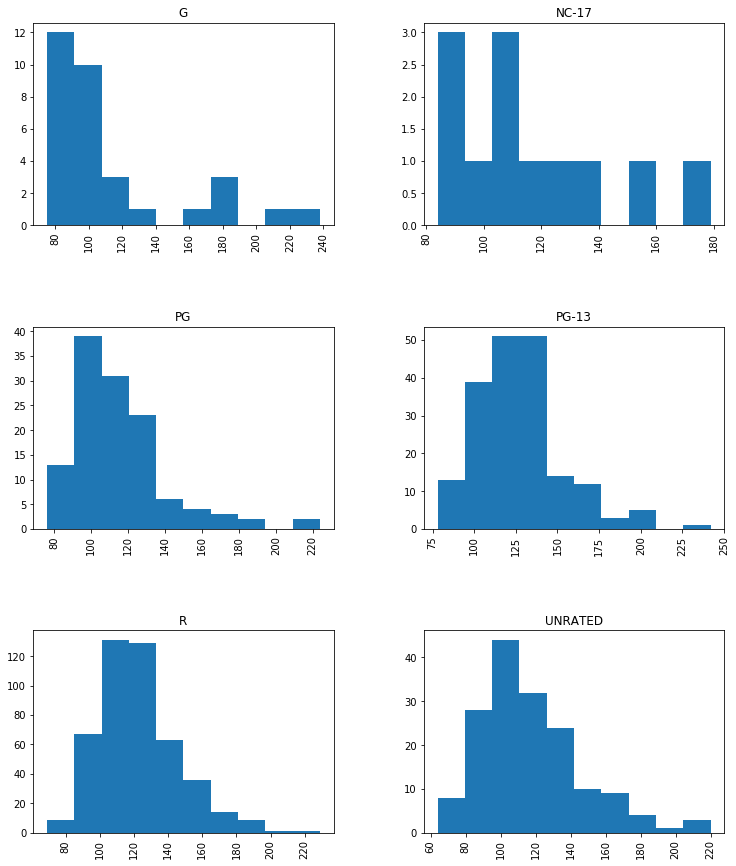

In [25]:
# Answer:
plt.scatter(movies['content_rating'], movies['duration'], c = movies['star_rating'])
movies.boxplot(column='duration', by='content_rating')
movies.duration.hist(by=movies.content_rating)

#### Determine the top rated movie (by star rating) for each genre.

In [26]:
# Answer:
movies.sort_values('star_rating', ascending = False).groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [27]:
# Answer:
dupe_titles = movies[movies.title.duplicated()].title
movies[movies.title.isin(dupe_titles)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [28]:
# Answer:
movies.genre.value_counts()
genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [29]:
# Answer:
genre_counts = movies['genre'].value_counts()
more_than_10 = genre_counts[genre_counts > 10].index
movies[movies.genre.isin(more_than_10)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [30]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [31]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [32]:
movies['actors_list'].value_counts()
print('Harry Potter has the most movies with the same actors list')

Harry Potter has the most movies with the same actors list


In [33]:
marky_mark = movies['actors_list'].str.contains('Mark Wahlberg')
print(movies[marky_mark].star_rating.mean())
print("Mark Wahlberg isn't as bad as people think!")

7.8
Mark Wahlberg isn't as bad as people think!


In [34]:
leo_length = movies['actors_list'].str.contains('Leonardo DiCaprio')
print(movies[marky_mark].duration.mean())
print("Leo doesn't make movies that are too long, on average")

130.66666666666666
Leo doesn't make movies that are too long, on average


In [35]:
sam_jackson = movies['actors_list'].str.contains('Samuel L. Jackson')
print(movies[sam_jackson].title.count())
print("Although it seems he's in everything, Samuel L Jackson has only been in 6 movies")

6
Although it seems he's in everything, Samuel L Jackson has only been in 6 movies
